In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape, add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import regularizers
from skimage.util import random_noise
import cv2
import keras
import os
from PIL import Image
# from wand.image import Image

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
PATH=r'/content/drive/MyDrive/dataset/clean'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory=os.listdir(PATH)
directory2=os.listdir("/content/drive/MyDrive/dataset/noisy")

In [ ]:
PATH2=r'/content/drive/MyDrive/dataset/noisy'

In [ ]:
directory.sort()
directory2.sort()

In [ ]:
X_train=[]
for file in directory:
    img=cv2.imread("{}/{}".format(PATH,file),0)
    # print(img)
    try:
      # img=cv2.resize(img)
      X_train.append(img)
    except:
      pass
    

In [ ]:
X_train=np.array(X_train)
X_train.shape

(1008, 256, 256)

In [ ]:
y_train=[]
for file in directory2:
    # print(file)
    img=cv2.imread("{}/{}".format(PATH2,file),0)
    # print(img)
    try:
      # img=cv2.resize(img)
      y_train.append(img)
    except:
      pass

In [ ]:
y_train=np.array(y_train)
y_train.shape

(1008, 256, 256)

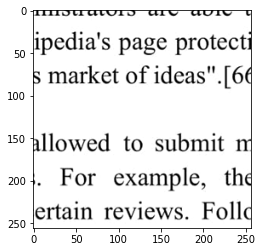

In [ ]:
plt.imshow(X_train[56],cmap='gray')

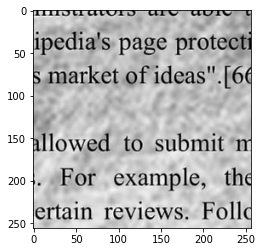

In [ ]:
plt.imshow(y_train[56],cmap='gray')

array([[255, 255, 254, ..., 255, 255, 255],
       [253, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 253, ..., 255, 255, 255],
       [255, 254, 253, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

array([[ 32,  47, 172, ..., 248, 151,  48],
       [  1,  16, 171, ..., 210,  37,  71],
       [  3,  19, 172, ..., 165,  13,  87],
       ...,
       [213, 215, 218, ..., 213, 212, 212],
       [214, 216, 218, ..., 214, 212, 211],
       [216, 217, 219, ..., 215, 213, 211]], dtype=uint8)

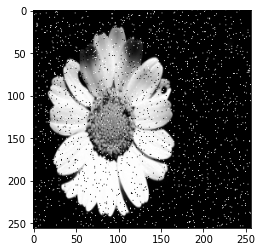

(200, 256, 256)

In [ ]:
# y_train=y_train/255.0

In [ ]:
X_train = X_train/255.0
y_train=y_train/255.0

In [ ]:
shape=X_train.shape
X_train.shape

(1008, 256, 256)

In [ ]:
X_train=X_train.reshape(shape[0],shape[1],shape[2],1)
# noise=noise.reshape(shape[0],shape[1],shape[2],1)
y_train=y_train.reshape(shape[0],shape[1],shape[2],1)

In [ ]:
X_train.shape

(1008, 256, 256, 1)

In [ ]:
y_train.shape

(1008, 256, 256, 1)

In [ ]:
# y_train.shape

noise=noise/255

In [ ]:
model=Sequential()

In [ ]:
input_img = keras.Input(shape=(256, 256, 1))
    #encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_1')(input_img)
x = MaxPooling2D((2, 2), padding='same', name = 'MaxPool_1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_2')(x)
encoded = MaxPooling2D((2, 2), padding='same', name = 'MaxPool_2')(x)
#decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_3')(encoded)
x = UpSampling2D((2, 2), name = 'UpSample_1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_4')(x)
x = UpSampling2D((2, 2), name = 'UpSample_2')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adamax', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 128, 128, 64)      0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 128, 128, 64)      36928     
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 64, 64, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 64, 64, 64)        36928     
_________________________________________________________________
UpSample_1 (UpSampling2D)    (None, 128, 128, 64)      0     

In [ ]:
autoencoder.fit(y_train, X_train,
                epochs=50,
                batch_size=16,
                shuffle=True)

Epoch 1/50
63/63 [==============================] - 429s 7s/step - loss: 0.1027
Epoch 2/50
63/63 [==============================] - 426s 7s/step - loss: 0.0899
Epoch 3/50
63/63 [==============================] - 431s 7s/step - loss: 0.0841
Epoch 4/50
63/63 [==============================] - 423s 7s/step - loss: 0.0801
Epoch 5/50
63/63 [==============================] - 423s 7s/step - loss: 0.0775
Epoch 6/50
63/63 [==============================] - 423s 7s/step - loss: 0.0755
Epoch 7/50
63/63 [==============================] - 426s 7s/step - loss: 0.0739
Epoch 8/50
63/63 [==============================] - 426s 7s/step - loss: 0.0726
Epoch 9/50
63/63 [==============================] - 426s 7s/step - loss: 0.0716
Epoch 10/50
63/63 [==============================] - 425s 7s/step - loss: 0.0707
Epoch 11/50
63/63 [==============================] - 425s 7s/step - loss: 0.0700
Epoch 12/50
63/63 [==============================] - 424s 7s/step - loss: 0.0693
Epoch 13/50
63/63 [==================

In [ ]:
noise.shape

(200, 256, 256, 1)

In [ ]:
noise_img = random_noise(X_train[1], mode='s&p',amount=0.05)
noise_img = np.array(255*noise_img, dtype = 'uint8')
# noise_img = cv2.add(X_train[56],gauss,dtype=cv2.CV_64F)

In [ ]:
X_train[56].shape

(256, 256, 1)

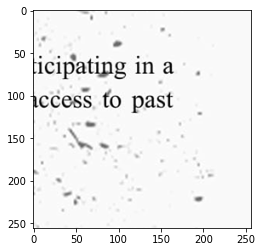

In [ ]:

img=autoencoder.predict(y_train[72].reshape(1,256,256,1))
plt.imshow(y_train[72].reshape(256,256),cmap="gray")

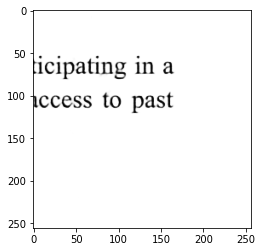

In [ ]:
# img=img*255.0
img=img.reshape(256,256)
plt.imshow(img,cmap='gray')

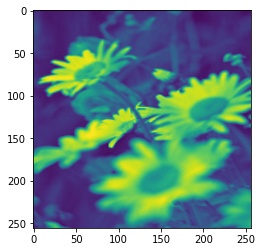

In [ ]:
plt.imshow(X_train[70].reshape(256,256))

In [ ]:
json_model = autoencoder.to_json()
json_file = open(r'smudge_autoencoder.json', 'w')
json_file.write(json_model)

# saving model weights
autoencoder.save_weights(r'smudge_autoencoder_weights.h5')